In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#load the datset
data_path = "/content/drive/MyDrive/KDDTrain+.txt"
# Define column names (Based on KDD'99 dataset feature names)
columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]
data = pd.read_csv(data_path,header=None, names=columns)



In [ ]:
print(data.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'difficulty_level'],
      dtype='object')


In [ ]:
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

           duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.00000

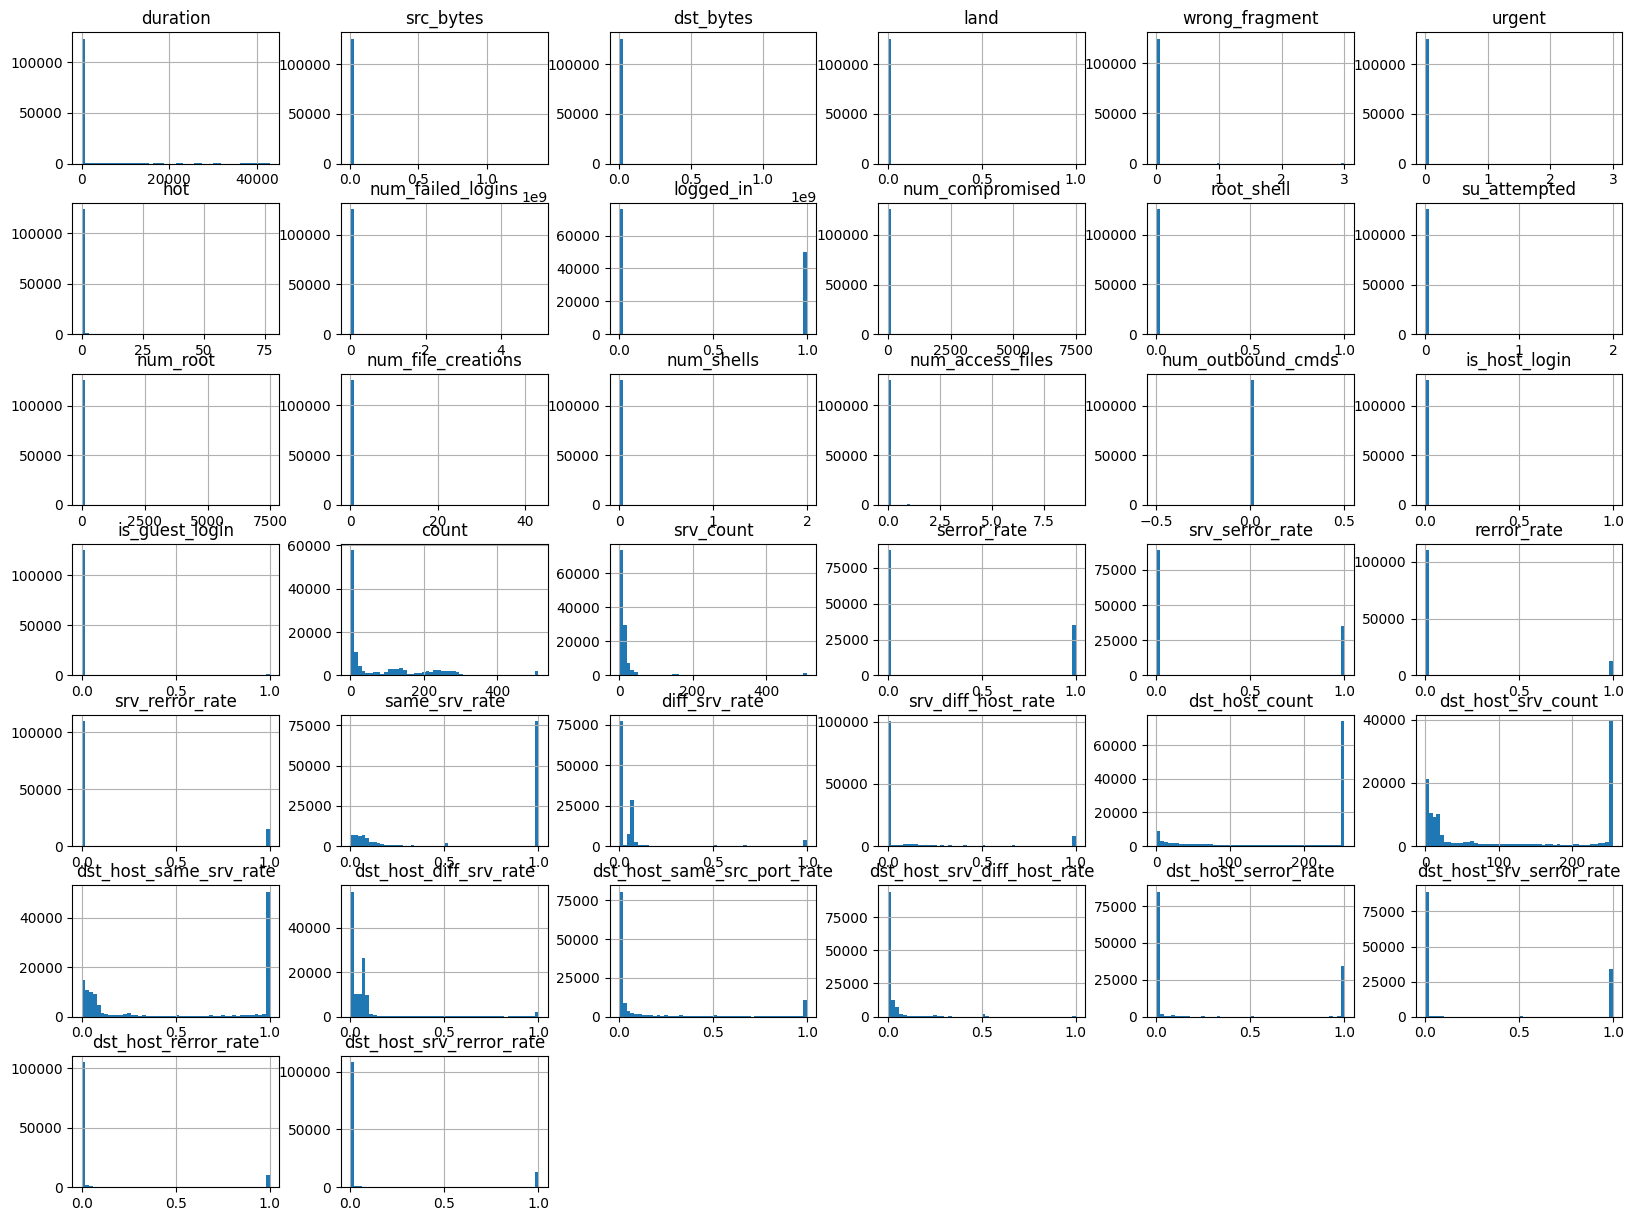

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


print(data.describe())
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
data['label'].value_counts()


,count
label,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
def change_label(df):
    # Strip trailing periods from labels to ensure correct mapping
    df['label'] = df['label'].str.rstrip('.')

    # Define a dictionary mapping each attack to its broader class
    attack_mapping = {
        **dict.fromkeys(['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm'], 'Dos'),
        **dict.fromkeys(['ftp_write', 'guess_passwd', 'httptunnel', 'imap', 'multihop', 'named', 'phf', 'sendmail',
                         'snmpgetattack', 'snmpguess', 'spy', 'warezclient', 'warezmaster', 'xlock', 'xsnoop'], 'R2L'),
        **dict.fromkeys(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 'Probe'),
        **dict.fromkeys(['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm'], 'U2R')
    }

    # Apply the mapping
    df['label'] = df['label'].map(attack_mapping).fillna(df['label'])

    # Optionally, print the updated label counts to verify
    print(df['label'].value_counts())

# Example usage
change_label(data)



label
normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64


# Data processing


In [ ]:
print(data.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

def normalize_data(df, numeric_cols):
    # Create an instance of the StandardScaler
    scaler = StandardScaler()

    # Apply the scaler to the DataFrame directly for the numeric columns
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    return df

# Example usage
numeric_cols = data.select_dtypes(include='number').columns
data = normalize_data(data, numeric_cols)

In [ ]:
data['label'].value_counts()

,count
label,
normal,67343
Dos,45927
Probe,11656
R2L,995
U2R,52


# One hot encoding


In [ ]:
import pandas as pd

def one_hot_encode_data(df, categorical_cols):
    # Check if all categorical columns exist in the DataFrame
    missing_cols = [col for col in categorical_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Columns missing from DataFrame: {missing_cols}")

    # Perform one-hot encoding on the specified categorical columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    return df

# Before encoding, verify columns exist
print("Current DataFrame columns:", data.columns)

# Specify the categorical columns (update if necessary based on the print output)
categorical_cols = ['protocol_type', 'service', 'flag']  # Adjust as necessary
categorical = data[categorical_cols]
categorical.head()

# Try one-hot encoding again
try:
    data = one_hot_encode_data(data, categorical_cols)
    print("One-hot encoding applied successfully.")
except ValueError as e:
    print(e)


Current DataFrame columns: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')
One-hot encoding applied successfully.


In [ ]:
categorical = pd.get_dummies(categorical, columns= categorical_cols)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
data.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=120)

In [ ]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [ ]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

In [ ]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="")
multi_data['label'] = multi_label
multi_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,True,False,4,False,False,False,False,True,normal
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,True,False,4,False,False,False,False,True,normal
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,False,False,0,True,False,False,False,False,Dos
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,False,True,False,4,False,False,False,False,True,normal
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,False,True,False,4,False,False,False,False,True,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,False,False,0,True,False,False,False,False,Dos
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,True,False,4,False,False,False,False,True,normal
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,False,True,False,4,False,False,False,False,True,normal
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,False,False,0,True,False,False,False,False,Dos


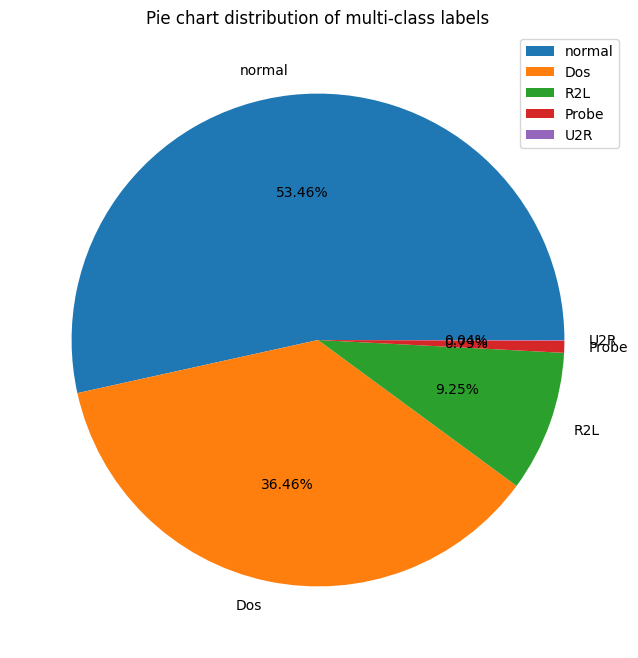

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()

plt.show()

In [ ]:
# Assuming 'numeric_col' contains the names of numeric columns
numeric_multi = multi_data[numeric_cols]
numeric_multi['intrusion'] = multi_data['intrusion']

# finding the attributes which have more than 0.5 correlation with encoded attack label attribute
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

<ipython-input-42-c16b118f8729>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['intrusion'] = multi_data['intrusion']


,intrusion
count,0.613251
logged_in,0.693770
srv_serror_rate,0.710852
serror_rate,0.712861
dst_host_serror_rate,0.714247
dst_host_same_srv_rate,0.716820
dst_host_srv_serror_rate,0.717387
dst_host_srv_count,0.718579
same_srv_rate,0.798358
intrusion,1.000000


In [ ]:
# selecting attributes found by using pearson correlation coefficient
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','dst_host_same_srv_rate',
                        'dst_host_srv_count', 'same_srv_rate','dst_host_srv_serror_rate','serror_rate','dst_host_serror_rate']]

In [ ]:
# joining the selected attribute with 'the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [ ]:
# Assuming 'categorical' refers to one-hot-encoded categorical data existing in 'multi_data'
# First, ensure 'categorical' is defined or extract it again
categorical_cols = [col for col in multi_data.columns if multi_data[col].dtype == 'uint8']
categorical = multi_data[categorical_cols]

# Joining selected numeric attributes with one-hot-encoded categorical data
numeric_multi = numeric_multi.join(categorical)

# Assuming 'numeric_multi' and 'multi_data' are already defined
# Rename 'intrusion' in 'numeric_multi' before joining
numeric_multi = numeric_multi.rename(columns={'intrusion': 'intrusion_numeric'})

# Now join the DataFrames without a conflict
final_data = numeric_multi.join(multi_data[['intrusion', 'Dos', 'Probe', 'R2L', 'U2R', 'normal', 'label']])



In [ ]:
multi_data

,count,logged_in,srv_serror_rate,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,dst_host_srv_serror_rate,serror_rate,dst_host_serror_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.717045,-0.809262,-0.631929,-0.782367,-0.818890,0.771283,-0.624871,-0.637209,-0.639532,False,...,False,True,False,4,False,False,False,False,True,normal
1,-0.620982,-0.809262,-0.631929,-1.161030,-1.035688,-1.321428,-0.624871,-0.637209,-0.639532,False,...,False,True,False,4,False,False,False,False,True,normal
2,0.339648,-0.809262,1.605104,-0.938287,-0.809857,-1.389669,1.618955,1.602664,1.608759,False,...,False,False,False,0,True,False,False,False,False,Dos
3,-0.690846,1.235694,-0.184522,1.066401,1.258754,0.771283,-0.602433,-0.189235,-0.572083,False,...,False,True,False,4,False,False,False,False,True,normal
4,-0.472521,1.235694,-0.631929,1.066401,1.258754,0.771283,-0.624871,-0.637209,-0.639532,False,...,False,True,False,4,False,False,False,False,True,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,-0.809262,1.605104,-0.938287,-0.818890,-1.184947,1.618955,1.602664,1.608759,False,...,False,False,False,0,True,False,False,False,False,Dos
125969,-0.717045,-0.809262,-0.631929,0.977304,1.159389,0.771283,-0.624871,-0.637209,-0.639532,False,...,False,True,False,4,False,False,False,False,True,normal
125970,-0.725778,1.235694,-0.631929,-0.893738,-0.773724,0.771283,-0.624871,-0.637209,0.979238,False,...,False,True,False,4,False,False,False,False,True,normal
125971,0.523041,-0.809262,1.605104,-1.094207,-0.972455,-1.366922,1.618955,1.602664,1.608759,False,...,False,False,False,0,True,False,False,False,False,Dos


In [ ]:
# # Sample a smaller subset of the data for development to avoid memory issues
# data_sample = data.sample(frac=0.3, random_state=42)  # Adjust the fraction as needed

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

# # Select a subset of features for polynomial feature generation to manage complexity
# selected_features = data_sample.columns[:10]  # Adjust based on feature importance or domain knowledge
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# interaction_features = poly.fit_transform(data_sample[selected_features])

# # Correct method to get feature names in newer sklearn versions
# interaction_feature_names = poly.get_feature_names_out(selected_features)

# # Combine with original data
# data_sample = pd.concat([data_sample.drop(selected_features, axis=1),
#                          pd.DataFrame(interaction_features, columns=interaction_feature_names, index=data_sample.index)], axis=1)

In [ ]:
# from sklearn.decomposition import PCA

# # Apply PCA to reduce dimensionality
# pca = PCA(n_components=0.95)  # Retains 95% of variance
# pca_features = pca.fit_transform(data_sample.select_dtypes(include=['float64', 'int64']))
# pca_columns = [f'PCA_{i}' for i in range(pca_features.shape[1])]
# data_sample = pd.concat([data_sample, pd.DataFrame(pca_features, columns=pca_columns, index=data_sample.index)], axis=1)

In [ ]:
# !pip install openTSNE
# from openTSNE import TSNE

# # Use openTSNE
# tsne = TSNE(n_components=2, random_state=42)
# tsne_features = tsne.fit(pca_features)  # Different syntax and usage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.7 MB/s eta 0:00:00


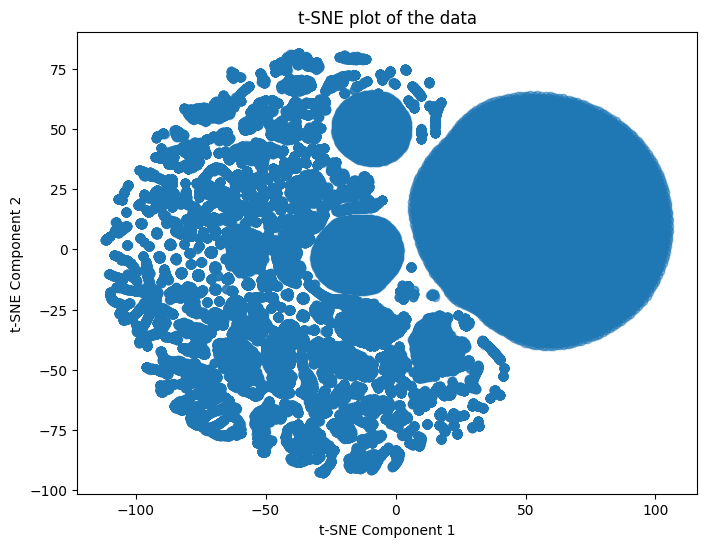

In [ ]:
# import matplotlib.pyplot as plt

# # Assuming tsne_features is an array with two components because n_components=2
# plt.figure(figsize=(8, 6))
# plt.scatter(tsne_features[:, 0], tsne_features[:, 1], alpha=0.5)
# plt.title('t-SNE plot of the data')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report
# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

!pip install -q keras

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# representation of model layers

print(multi_data.columns)

Index(['count', 'logged_in', 'srv_serror_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'same_srv_rate', 'dst_host_srv_serror_rate',
       'serror_rate', 'dst_host_serror_rate', 'protocol_type_icmp',
       'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11',
       'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime',
       'service_discard', 'service_domain', 'service_domain_u', 'service_echo',
       'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec',
       'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher',
       'service_harvest', 'service_hostnames', 'service_http',
       'service_http_2784', 'service_http_443', 'service_http_8001',
       'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell',
       'service_ldap', 'service_link', 'service_login', 'service_mtp',
       'service_name', 'service_netbios_d

# Linear support vector machine classifier

In [ ]:
X = multi_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded, original)
Y = multi_data['intrusion'] # target attribute

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.svm import SVC
lsvm=SVC(kernel='linear',gamma='auto')
lsvm.fit(X_train,y_train) # training model on training dataset

In [ ]:

y_pred=lsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LSVM-Classifier Multi-class Set-Accuracy is ", ac)

LSVM-Classifier Multi-class Set-Accuracy is  95.24988886772083


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lsvm, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())

Cross-validated scores: [0.95459356 0.95226503 0.95501693 0.95305885 0.95125695]
Average score: 0.9532382647856297


In [ ]:
import numpy as np
print("Class distribution in training set:", np.bincount(y_train))
print("Class distribution in test set:", np.bincount(y_test))

Class distribution in training set: [34443  8709   721    37 50569]
Class distribution in test set: [11484  2947   274    15 16774]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11484
           1       0.86      0.79      0.82      2947
           2       0.61      0.60      0.61       274
           3       0.00      0.00      0.00        15
           4       0.97      0.98      0.98     16774

    accuracy                           0.95     31494
   macro avg       0.68      0.67      0.67     31494
weighted avg       0.95      0.95      0.95     31494



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[11077   203     0     0   204]
 [  470  2326     1     0   150]
 [    0     0   165     0   109]
 [    0     0     7     0     8]
 [   82   164    98     0 16430]]


# KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred= knn.predict(X_test)
accuracy= accuracy_score(y_test,y_pred)
print("KNN classifier multi-class accuracy is ", accuracy)

KNN classifier multi-class accuracy is  0.9829808852479838


In [ ]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.99      0.99     11484
       Probe       0.96      0.96      0.96      2947
         R2L       0.89      0.87      0.88       274
         U2R       0.40      0.13      0.20        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.85      0.79      0.80     31494
weighted avg       0.98      0.98      0.98     31494



In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.050136533942973266
Mean Squared Error -  0.16888931224995238
Root Mean Squared Error -  0.41096144861769257
R2 Score -  95.34014390802625
Accuracy -  98.29808852479837


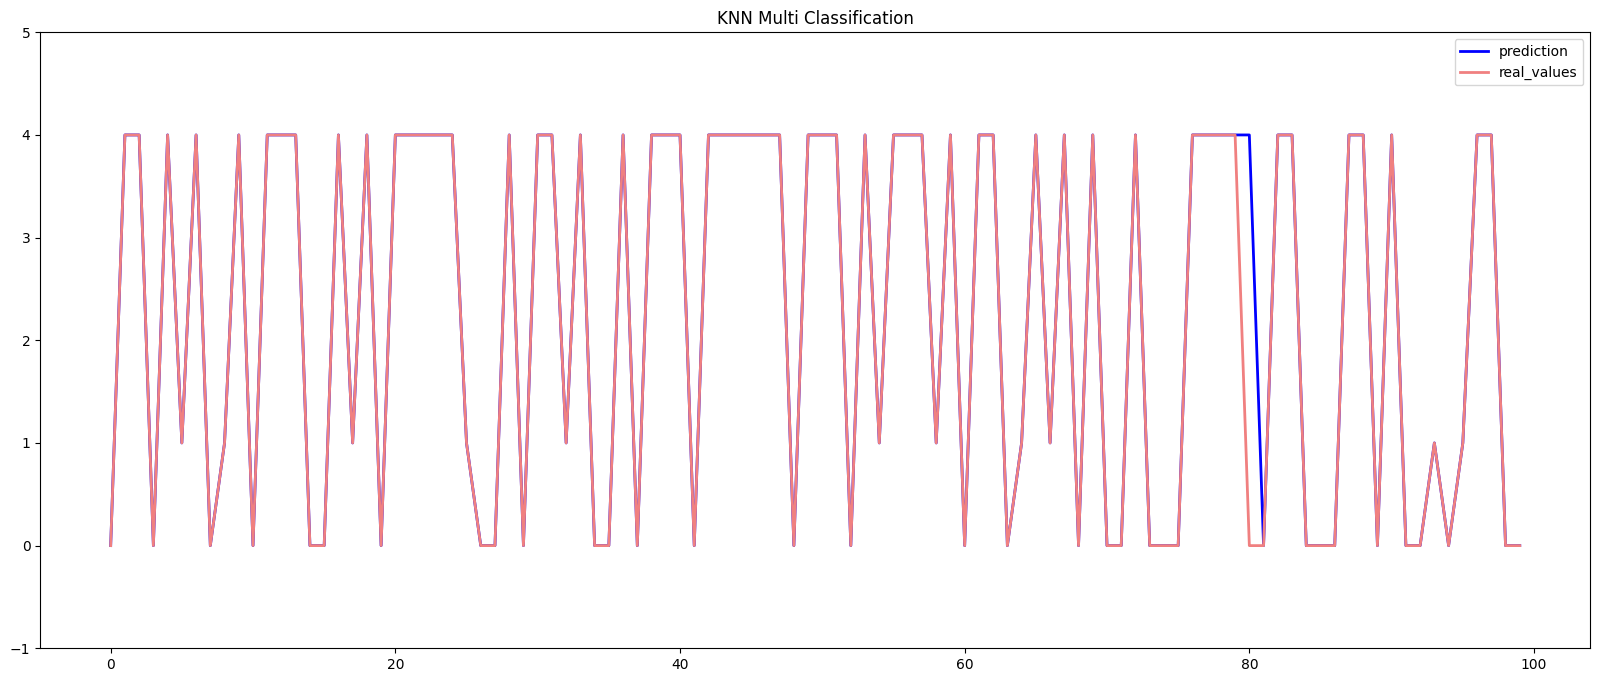

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("KNN Multi Classification")

plt.show()

# Multi layer perceptron classifier

In [ ]:
X = multi_data.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
mlp = Sequential()
# Explicit input layer
mlp.add(Input(shape=(X_train.shape[1],)))  # Ensure this matches the number of features in X_train
# First dense layer with 50 neurons, no need to specify input_dim here
mlp.add(Dense(units=50, activation='relu'))
# Output layer with softmax activation for a classification task with 5 classes
mlp.add(Dense(units=5, activation='softmax'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# summary of model layers
mlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 50)                  │           4,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,955 (19.36 KB)

 Trainable params: 4,955 (19.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2572 - loss: 1.5936 - val_accuracy: 0.8499 - val_loss: 1.1025
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8627 - loss: 0.9912 - val_accuracy: 0.8768 - val_loss: 0.7095
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8738 - loss: 0.6522 - val_accuracy: 0.8765 - val_loss: 0.5053
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8724 - loss: 0.4781 - val_accuracy: 0.8771 - val_loss: 0.4019
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8752 - loss: 0.3858 - val_accuracy: 0.8826 - val_loss: 0.3453
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8851 - loss: 0.3397 - val_accuracy: 0.9231 - val_loss: 0.3090
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9242 - loss: 0.3010 - val_accuracy: 0.9316 - val_loss: 0.2829
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9325 - loss: 0.2729 - val_accuracy: 0.

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9682 - loss: 0.0972
Test results - Loss: 0.09304678440093994 - Accuracy: 96.91687226295471%


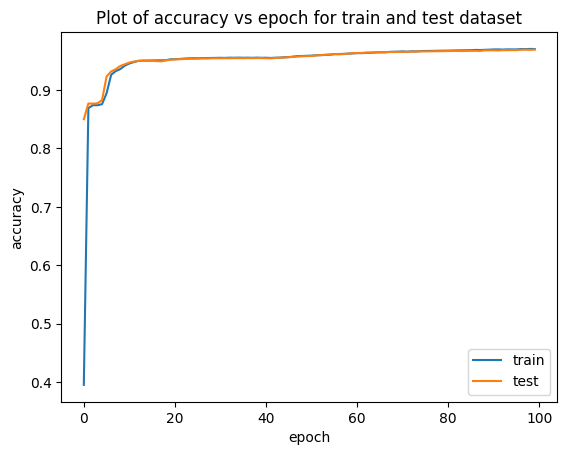

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.show()

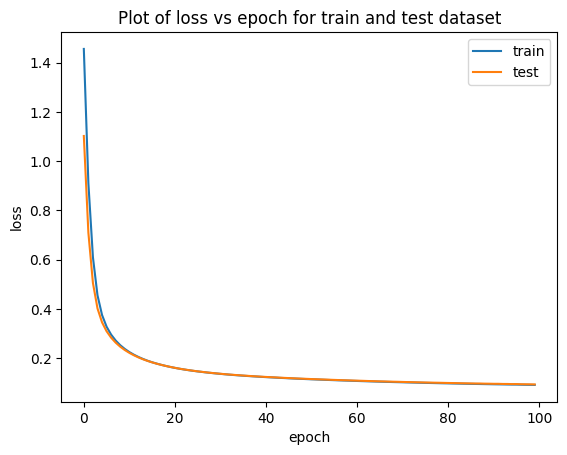

In [ ]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

In [ ]:
n_classes = len(le2.classes_)
n_classes

5

In [ ]:
y_pred = mlp.predict(X_test)

985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [ ]:
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test.iloc[:, i], y_pred[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

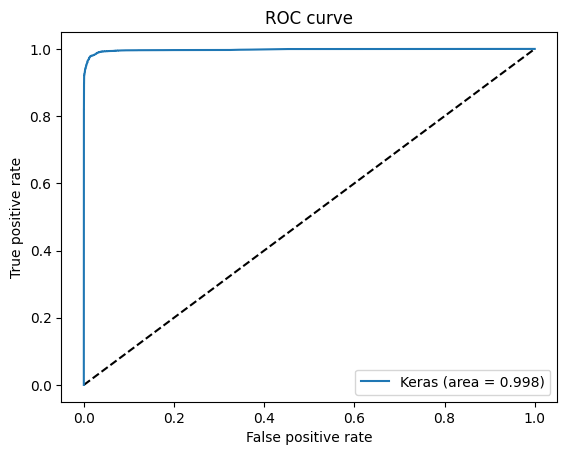

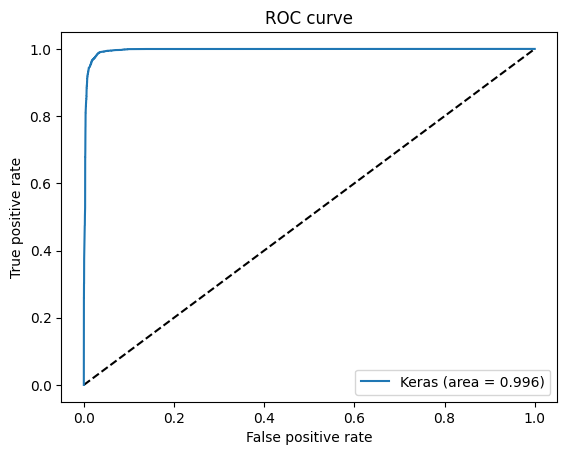

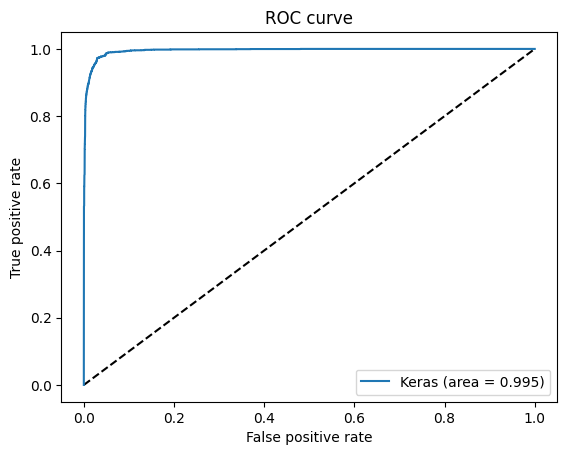

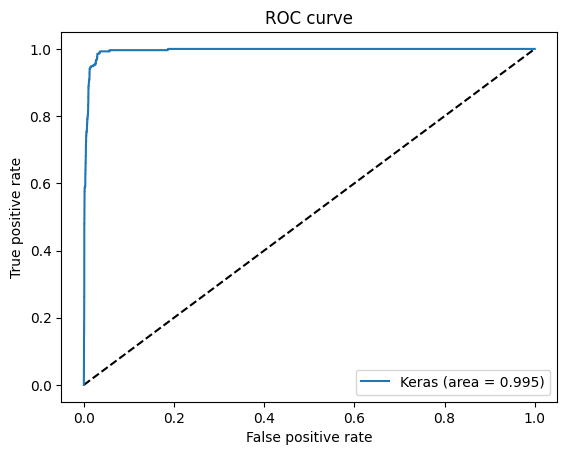

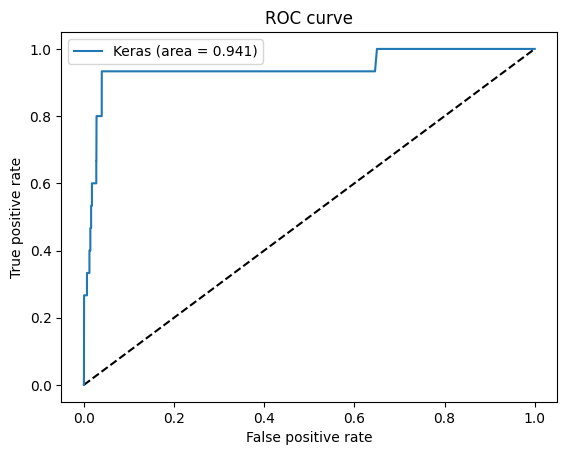

In [ ]:
for i in range(n_classes):
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_mlp[i], tpr_mlp[i], label='Keras (area = {:.3f})'.format(roc_auc_mlp[i]))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')

  plt.show()

In [ ]:
pred = mlp.predict(X_test)

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
for j in range(0,pred.shape[1]):
  for i in range(0,pred.shape[0]):
    pred[i][j] = int(round(pred[i][j]))

In [ ]:
pred_df = pd.DataFrame(pred,columns=y_test.columns)

In [ ]:
print("Recall Score - ",recall_score(y_test,pred_df.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,pred_df.astype('uint8'),average='micro'))

Recall Score -  0.9658665142566838
F1 Score -  0.9682183496458979
Precision Score -  0.9705816661880604


# CNN

In [ ]:
X = multi_data.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 91, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 45, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 43, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 21, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1344)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │          67,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,841 (288.44 KB)

 Trainable params: 73,841 (288.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6547 - loss: 1.2794 - val_accuracy: 0.8487 - val_loss: 0.5293
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 782ms/step - accuracy: 0.8571 - loss: 0.4389 - val_accuracy: 0.9183 - val_loss: 0.2983
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 782ms/step - accuracy: 0.9283 - loss: 0.2736 - val_accuracy: 0.9374 - val_loss: 0.2426
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 712ms/step - accuracy: 0.9413 - loss: 0.2288 - val_accuracy: 0.9404 - val_loss: 0.2075
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 785ms/step - accuracy: 0.9430 - loss: 0.1970 - val_accuracy: 0.9428 - val_loss: 0.1859
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 782ms/step - accuracy: 0.9455 - loss: 0.1738 - val_accuracy: 0.9443 - val_loss: 0.1700
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 763ms/step - accuracy: 0.9454 - loss: 0.1664 - val_accuracy: 0.9438 - val_loss: 0.1580
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 779ms/step - accuracy: 0.9459 - loss: 0.1513 - val

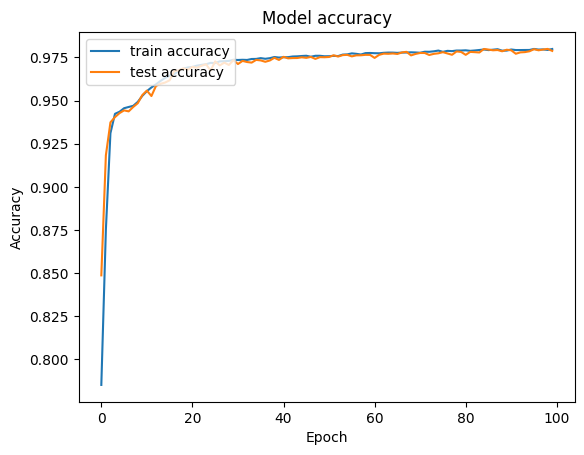

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input

# Define the model
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),  # Ensure input shape is correct, needs a third dimension
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(units=50, activation='relu'),
    Dense(units=5, activation='softmax')  # Adjust the number of units to match the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Assuming your labels (y_train and y_test) are one-hot encoded for categorical crossentropy
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=5000, validation_data=(X_test, y_test))

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9773 - loss: 0.0749
Test results - Loss: 0.06766720861196518 - Accuracy: 97.8821337223053%


In [ ]:
n_classes = len(le2.classes_)
n_classes

5

In [ ]:
y_pred = model.predict(X_test)

985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


In [ ]:
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test.iloc[:, i], y_pred[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

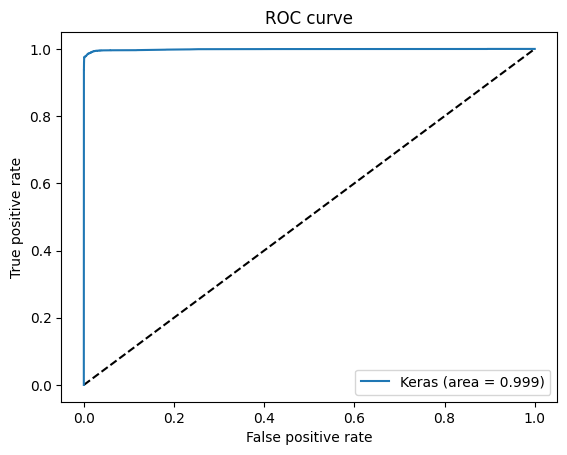

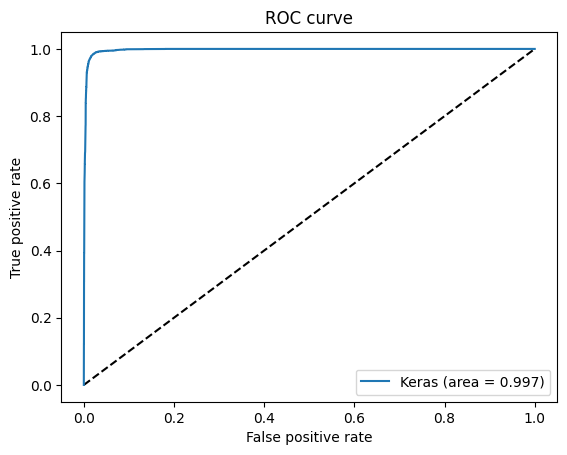

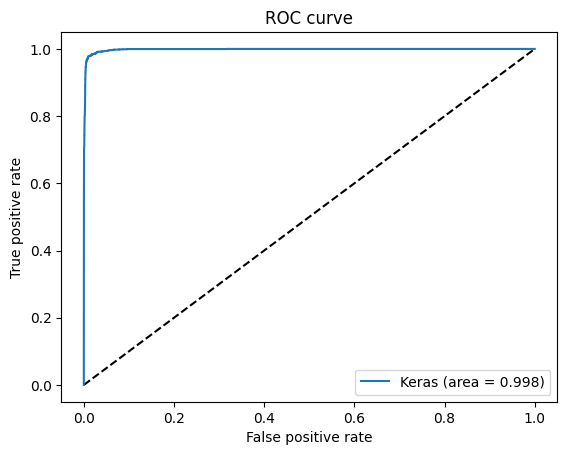

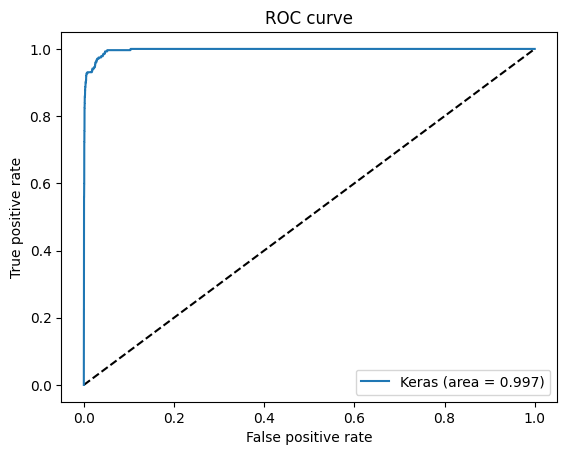

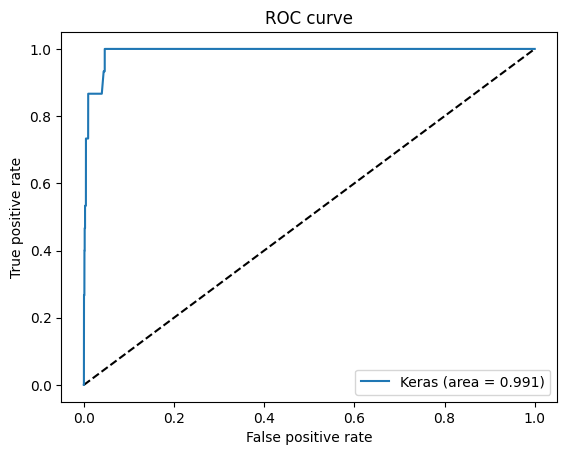

In [ ]:
for i in range(n_classes):
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_mlp[i], tpr_mlp[i], label='Keras (area = {:.3f})'.format(roc_auc_mlp[i]))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')

  plt.show()

In [ ]:
pred = model.predict(X_test)
for j in range(0,pred.shape[1]):
  for i in range(0,pred.shape[0]):
    pred[i][j] = int(round(pred[i][j]))

pred_df = pd.DataFrame(pred,columns=y_test.columns)

985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [ ]:
print("Recall Score - ",recall_score(y_test,pred_df.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,pred_df.astype('uint8'),average='micro'))

Recall Score -  0.9779640566457103
F1 Score -  0.9787876380392468
Precision Score -  0.9796126077414841


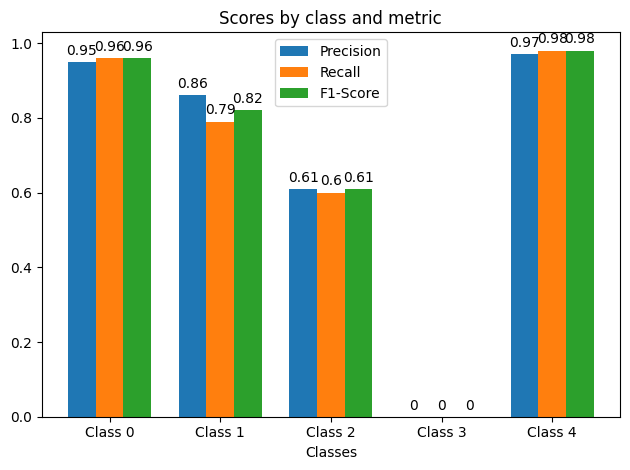

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
precision = [0.95, 0.86, 0.61, 0.00, 0.97]
recall = [0.96, 0.79, 0.60, 0.00, 0.98]
f1_scores = [0.96, 0.82, 0.61, 0.00, 0.98]

x = np.arange(len(classes))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_scores, width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_title('Scores by class and metric')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.show()